# AutoRegressive Model AR(p)
menggunakan nilai sebelumnya sebagai regresor.
Biasanya digunakan pada data yang stasioner.

In [1]:
from luwiji.time_series import demo, illustration

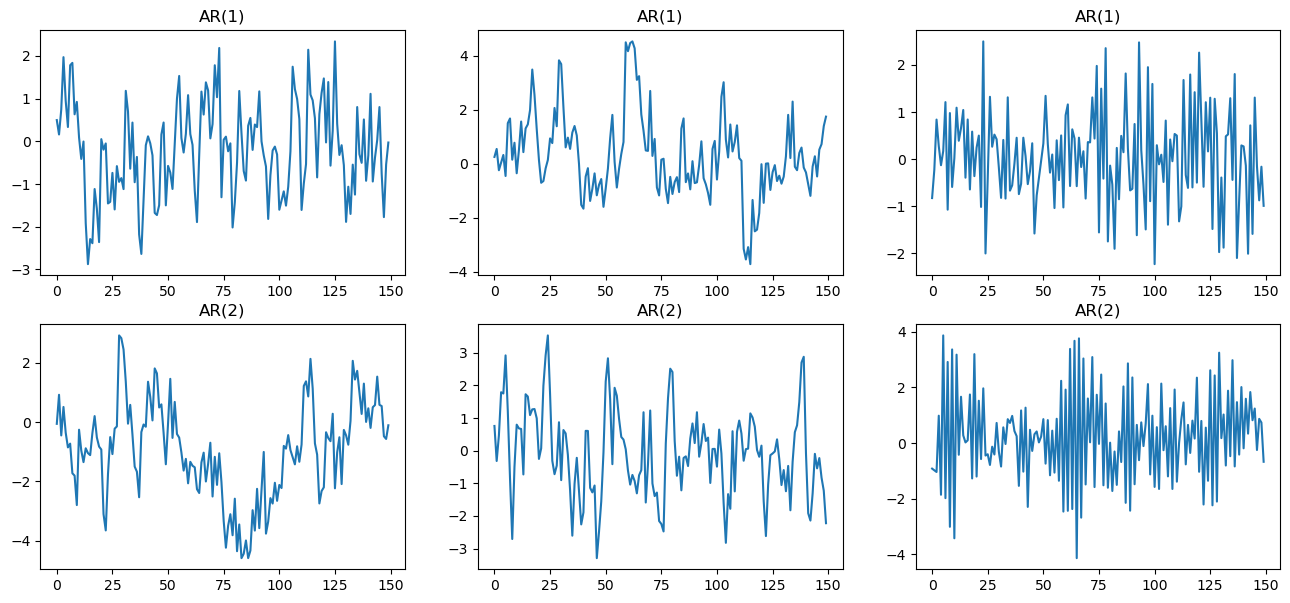

In [2]:
demo.AR_example()

# Moving Average Model MA(q)
Menggunaan error sebagai fitur regresor.

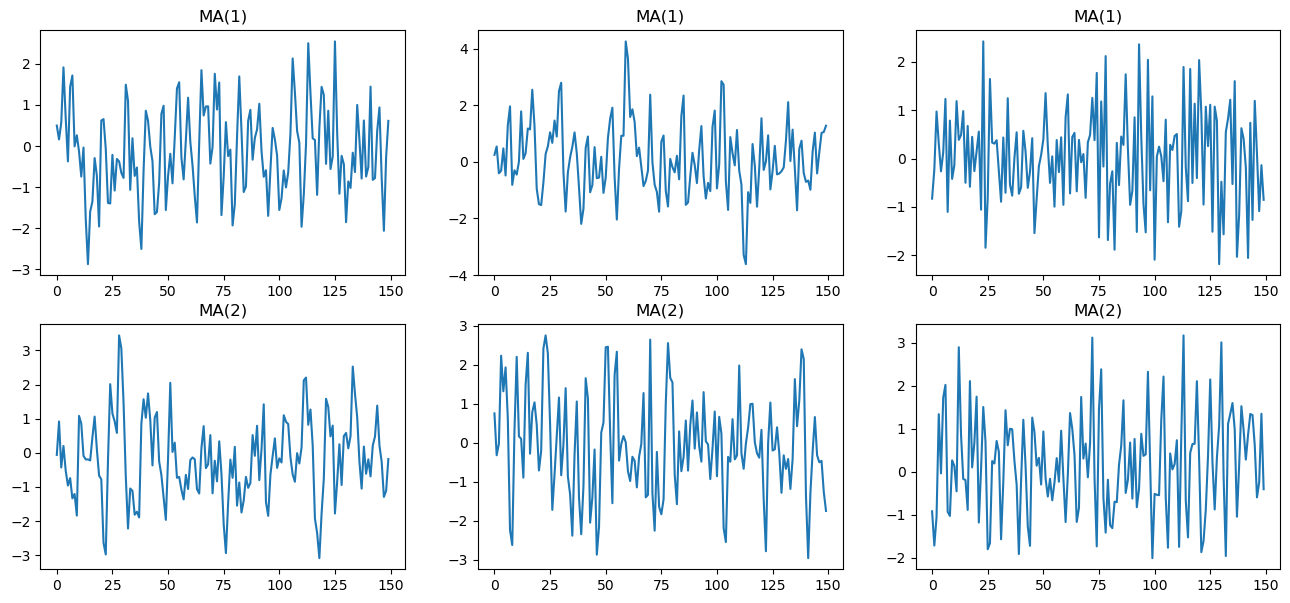

In [4]:
demo.MA_example()

# How to choose ARMA(p,q) -> ACF and PACF

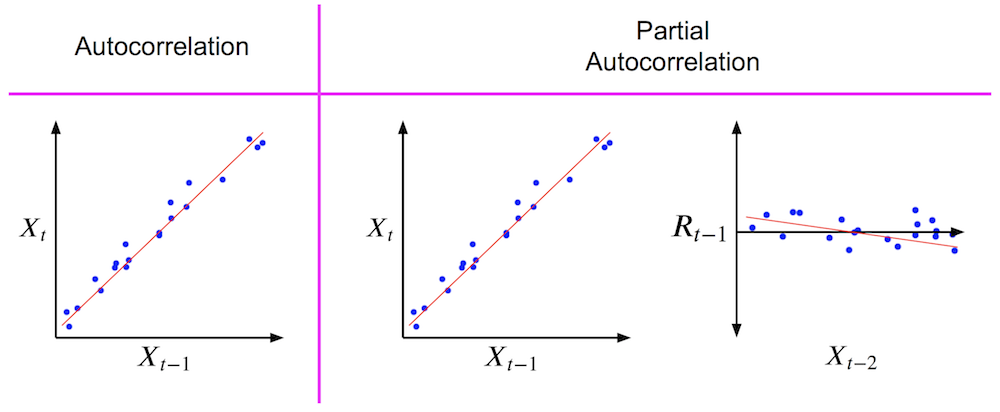

In [3]:
illustration.autocorrelation

## Orde AR(p)

1. ACF: Dumped geometric
2. PACF: Signifikan hingga lag p

In [5]:
demo.AR1_simulation()

interactive(children=(FloatSlider(value=0.6, description='alpha1', max=2.0, min=-2.0), Output()), _dom_classes…

In [6]:
demo.AR2_simulation()

interactive(children=(FloatSlider(value=0.5, description='alpha1', max=2.0, min=-2.0), FloatSlider(value=0.3, …

## Orde MA(q)

1. ACF: Signifikan hingga lag p
2. PACF: Dumped geometric

In [7]:
demo.MA1_simulation()

interactive(children=(FloatSlider(value=0.6, description='theta1', max=2.0, min=-2.0), Output()), _dom_classes…

In [8]:
demo.MA2_simulation()

interactive(children=(FloatSlider(value=0.6, description='theta1', max=2.0, min=-2.0), FloatSlider(value=0.6, …

## ARMA (p,q)

In [9]:
demo.AR2MA2_simulation()

interactive(children=(FloatSlider(value=0.7, description='alpha1', max=2.0, min=-2.0), FloatSlider(value=-0.4,…

## Nonstationary series? > ARIMA(p,d,q)

/home/gilkey/miniconda3/envs/jcop_ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


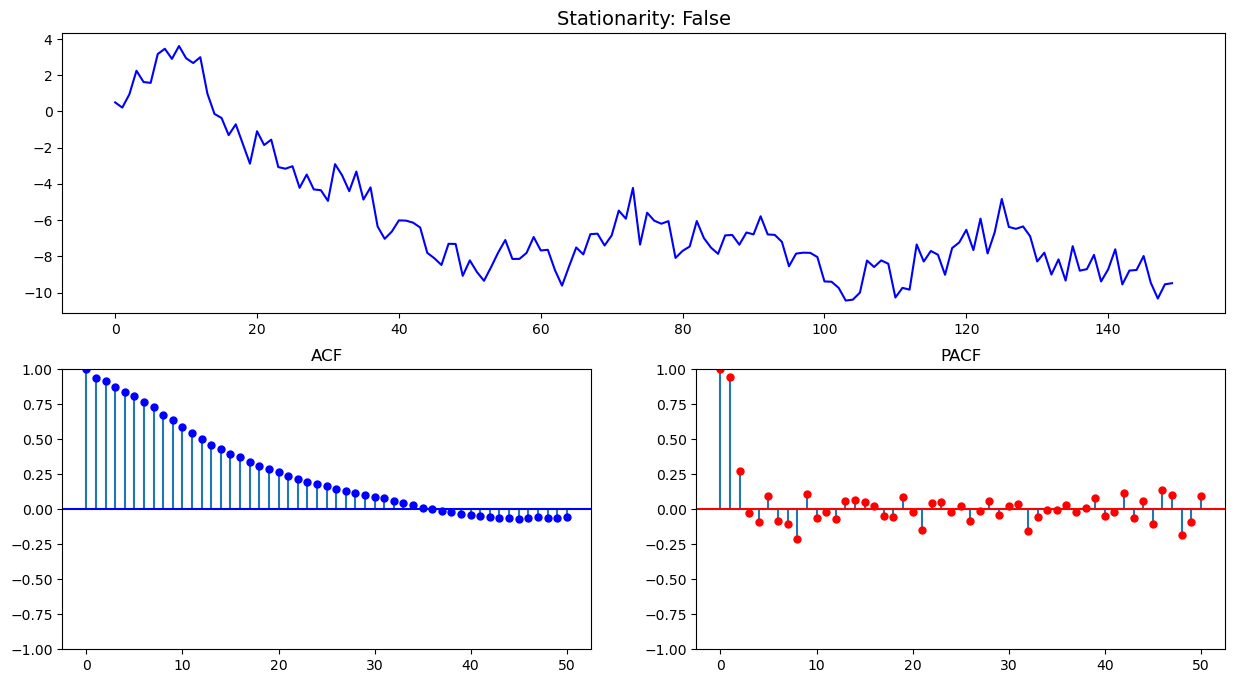

In [10]:
demo.nonstationarity_simulation()

/home/gilkey/miniconda3/envs/jcop_ts/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


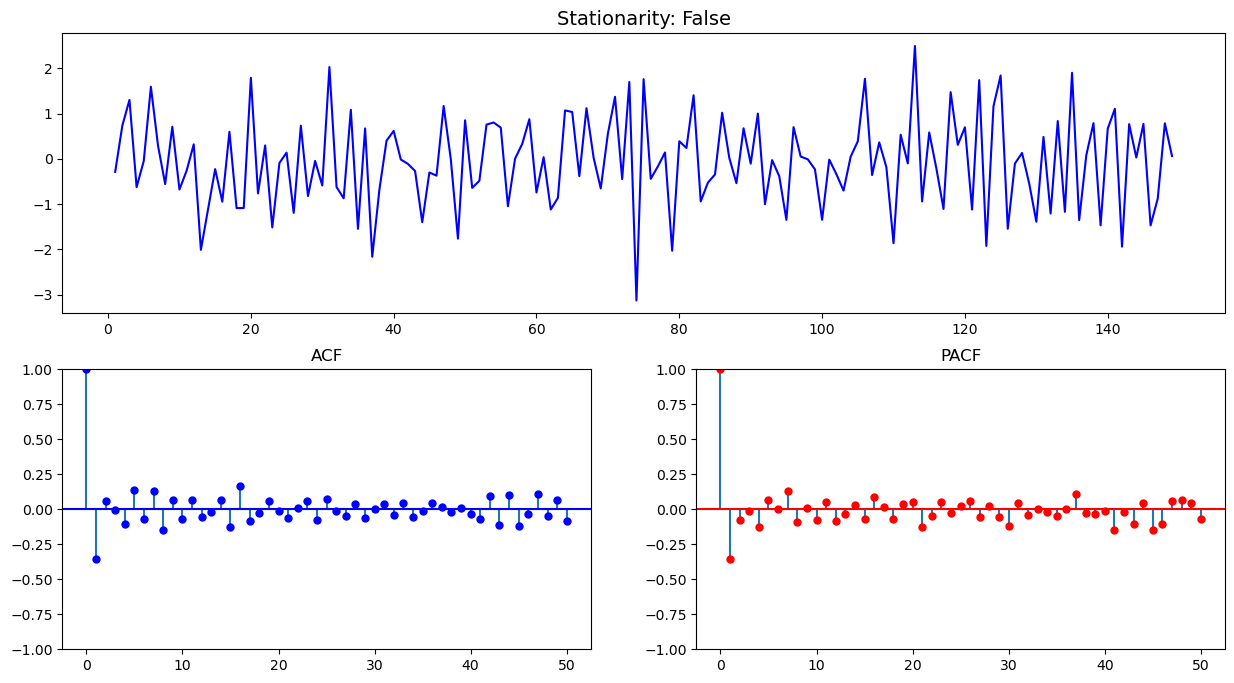

In [11]:
demo.nonstationarity_simulation(diff=True)

# Recomended way -> Model Search with AIC, AICc, BIC
1. AIC = Akaike Information Criterion
2. AICc = Corrected AIC
3. BIC = Bayesian Information Criterion

Penilaian kualitas pada suatu model yang dapat digunakan untuk memilih model paling baik. Akan tetapi, kurang cocok untuk menilai differencing (d)

## Auto ARIMA -> Pyramid Arima

In [12]:
from pmdarima import auto_arima

In [13]:
import pandas as pd
import matplotlib.pyplot as plt 

<AxesSubplot:xlabel='Date'>

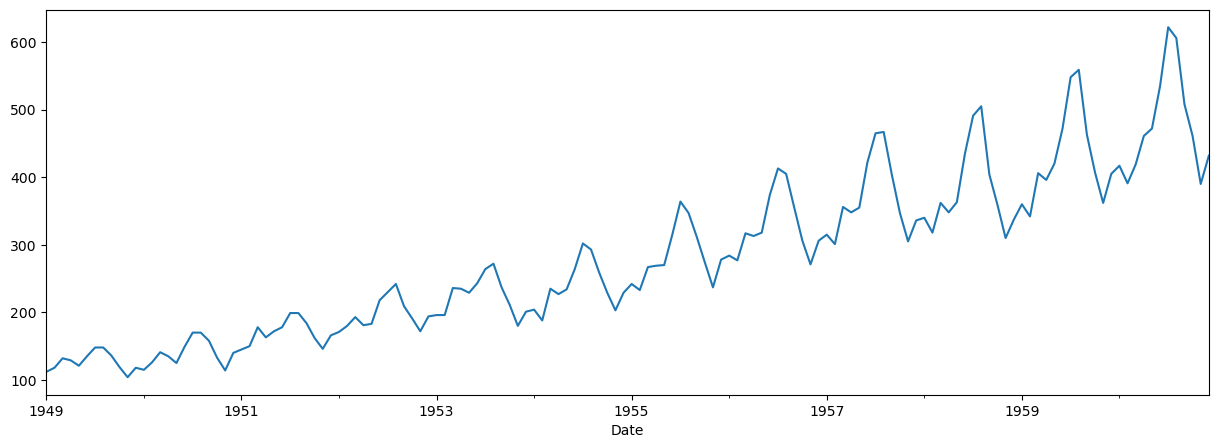

In [14]:
df = pd.read_csv('data/airline.csv', index_col='Date', parse_dates=['Date'])
series = df.passengers
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,5))

In [15]:
arima = auto_arima(X_train, seasonal=True, m=12, information_criterion='aicc', trace=True, random_state=42)

Performing stepwise search to minimize aicc
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AICC=807.172, Time=21.34 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AICC=900.025, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AICC=803.805, Time=6.34 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AICC=852.869, Time=4.24 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AICC=1051.707, Time=0.14 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AICC=802.465, Time=0.23 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AICC=803.877, Time=4.09 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AICC=805.913, Time=9.82 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AICC=802.029, Time=0.48 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AICC=803.787, Time=6.20 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AICC=803.864, Time=5.90 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AICC=inf, Time=13.12 sec
 ARIMA(3,0,0)(0,1,0)[12] intercept   : AICC=802.349, Time=0.74 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AICC=802.578, Time=0.42 sec
 ARIMA(1,0,1)(0,1,0

In [18]:
arima

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

In [19]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  119
Model:             SARIMAX(2, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -396.839
Date:                            Thu, 18 Jan 2024   AIC                            801.679
Time:                                    00:22:44   BIC                            812.370
Sample:                                         0   HQIC                           806.013
                                            - 119                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.5597      2.054      2.220      0.026       0.533       8.586
ar.L1          0.6701      0.100      6.694      0.000       0.474       0.866
ar.L2          0.1562      0.097      1.614      0.106      -0.033       0.346
sigma2        96.5155     11.915      8.101      0.000      73.163     119.868
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.62
Prob(Q):                              0.92   Prob(JB):                         0.45
Heteroskedasticity (H):               1.47   Skew:                             0.00
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
n_forecast = len(X_test) + 20
pred = arima.predict(n_forecast)

dates = pd.date_range(X_train.index[-1], periods=n_forecast, freq='M')
pred = pd.Series(pred, index=dates)

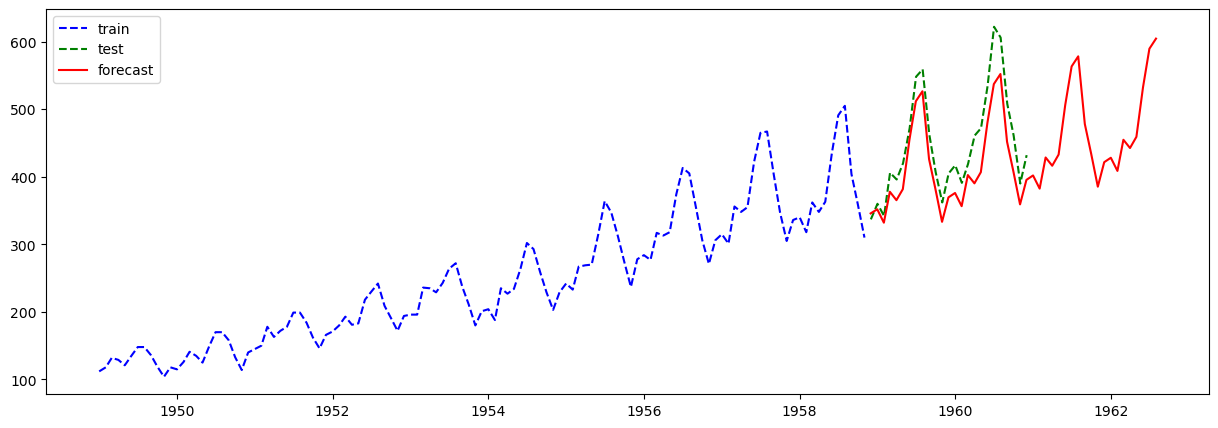

In [21]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b--', label='train')
plt.plot(X_test, 'g--', label='test')
plt.plot(pred, 'r-', label='forecast')
plt.legend()